# Aula 6 - Exercícios - Storytelling
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [2]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib
import re

### 6.1 Escreva uma função para encontrar numa string todos os grupos de letras em que uma letra a é seguida de 3 letras b. 


In [3]:
def a3b(s):
    """retorne o valor de: n+nn+nnn
    """
    # YOUR CODE HERE
    try:
        return re.findall("(abbb)", s)
    except ValueError as e:
        raise NotImplementedError(e)


In [6]:
## Faça seus testes aqui
strtest = 'abbabbbb asabbbde ababbaaabbbabbabbbb'
a3b(strtest)

['abbb', 'abbb', 'abbb', 'abbb']

In [7]:
# Validação para nota
assert a3b('abbb asde ababbaaabbbabbb') == ['abbb', 'abbb', 'abbb']

### 6.2 Escreva uma função para retornar os números presentes ao final de uma string. 
#### Retorne uma lista vazia se os ultimos caracteres não forem uma string.


In [66]:
def get_final_numbers(s):
    """retorne True ou False dependendo se a string s contém o
       padrão especificado no enunciado.
    """
    # YOUR CODE HERE
    try:
        return [x for x in re.findall("\d*$", s) if x != '']
        
    except ValueError as e:
        raise NotImplementedError(e)


In [68]:
## Faça seus testes aqui
strtest = '33a3079a'
get_final_numbers(strtest)

[]

In [69]:
# Validação para nota
assert get_final_numbers('33a307a') == []
assert get_final_numbers('33a307') == ['307']

### 6.3 Analise o dataset de curetagem e argumente baseado em dados se o dado da quantidade de procedimentos de curetagem é periódico ou não.
#### Se for periódico, encontre qual o período médio do pico. Elenque possíveis causas desta periodicidade.
#### Faça suas análises em até 4 células


In [73]:
# YOUR CODE HERE
path_curetagem = '../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'
df_curetagem = pd.read_excel(path_curetagem, na_values='-')
df_curetagem.rename(columns={'Unidade da Federação': 'uf'}, inplace=True)
del df_curetagem['Total']
df_curetagem.head()

,uf,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun
0,35 São Paulo,2153,2800.0,2892,3000,3201,3008,3412,3395,3623,...,2852,2968,2946,2756,2771,2520,2595,2476,2559,2365.0
1,29 Bahia,1156,1640.0,1560,1722,1530,2089,1831,2267,2403,...,1533,1505,1545,1418,1462,1192,1375,1363,1260,1245.0
2,31 Minas Gerais,1193,1499.0,1601,1398,1534,1787,1639,1730,1751,...,1221,1459,1333,1359,1260,1235,1413,1196,1158,1086.0
3,33 Rio de Janeiro,679,816.0,1134,1072,1254,1243,1326,1475,1270,...,1308,1350,1217,1085,1049,930,919,946,920,910.0
4,26 Pernambuco,489,904.0,796,1142,903,877,886,1003,1008,...,796,795,778,831,738,647,749,693,716,666.0


In [74]:
# YOUR CODE HERE
df_unpivoted = df_curetagem.melt(id_vars=['uf'], var_name='data', value_name='qtd')
df_unpivoted.head()

,uf,data,qtd
0,35 São Paulo,2008/Jan,2153.0
1,29 Bahia,2008/Jan,1156.0
2,31 Minas Gerais,2008/Jan,1193.0
3,33 Rio de Janeiro,2008/Jan,679.0
4,26 Pernambuco,2008/Jan,489.0


In [75]:
# YOUR CODE HERE
from datetime import datetime
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

df_unpivoted['mes'] = df_unpivoted['data'].apply(lambda x: datetime.strptime(x, '%Y/%b').month)
df_unpivoted['ano'] = df_unpivoted['data'].apply(lambda x: datetime.strptime(x, '%Y/%b').year)
df_unpivoted['data'] = df_unpivoted['data'].apply(lambda x: datetime.strptime(x, '%Y/%b'))
df_unpivoted['qtd'] = df_unpivoted['qtd'].astype(float)
df_unpivoted.head()

,uf,data,qtd,mes,ano
0,35 São Paulo,2008-01-01,2153.0,1,2008
1,29 Bahia,2008-01-01,1156.0,1,2008
2,31 Minas Gerais,2008-01-01,1193.0,1,2008
3,33 Rio de Janeiro,2008-01-01,679.0,1,2008
4,26 Pernambuco,2008-01-01,489.0,1,2008


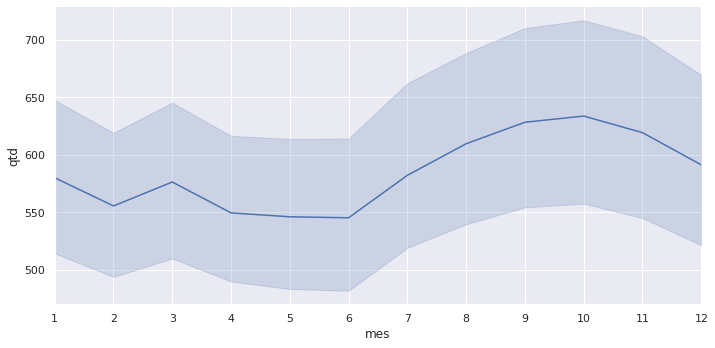

In [85]:
# YOUR CODE HERE
g = sns.relplot(kind='line', x='mes', y='qtd', aspect=2, data=df_unpivoted)
g.set(xlim=(1,12), xticks=[x for x in range(1,13)])

#------------------------------------------------------
# COMENTÁRIOS DO ALUNO - HALISSON S GOMIDES
#------------------------------------------------------
# 1. Analisando o gráfico abaixo, que corresponde à quantidade de procedimentos de curetagem
# realizados durante os meses do ano, com dados de 2008 a 2018, nota-se que a quantidade se 
# mostra periódica (sazonal).
# 2. Nota-se que nos meses de setembro e outubro há uma incidência maior da realização de procedimentos
# de curetagem, sendo esses meses o período médio do pico.
# 3. Se a maior quantidade de procedimetos de curetagem ocorre em setembro e outubro, conclui-se que
# o perído gestacional dever ter se iniciado entre os meses de julho e agosto.
# Uma das possíveis causas dessa periodicidade pode ser: férias escolares, para o público adolescente

### 6.4 Reescreva em português todos os textos que aparecem no gráfico a seguir. 


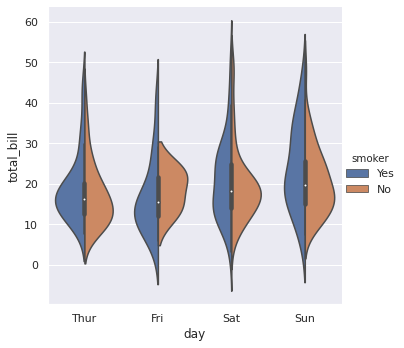

In [86]:
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor
tips = sns.load_dataset("tips") 
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);

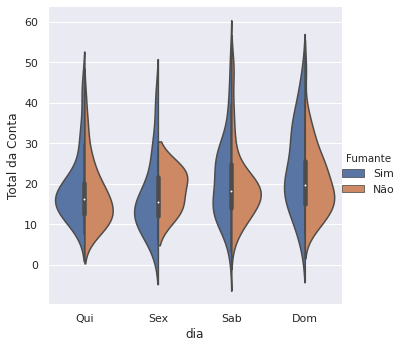

In [94]:
# YOUR CODE HERE
g= sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);
g.set_axis_labels("dia", "Total da Conta")
g.ax.set_xticklabels(["Qui", "Sex", "Sab", "Dom"]);
g._legend.set_title("Fumante")
new_labels = ['Sim', 'Não']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

### 6.5 Analise o dataset titanic e encontre duas variáveis que tenham relação com a probabilidade de sobreviência ao acidente com o navio.
#### Plote gráficos com a biblioteca seaborn para mostrar suas conclusões.
#### Use funções do seaborn ou do matplotlib para personalisar e destacar as suas conclusões.
#### Use no máximo 4 células para colocar sua resposta.


In [141]:
# YOUR CODE HERE
df_titanic = sns.load_dataset("titanic")
df_plot = df_titanic.groupby(['sex', 'pclass']).agg({'survived': ['sum'],'fare': ['mean']})
df_plot

survived        fare
                   sum        mean
sex    pclass                     
female 1            91  106.125798
       2            70   21.970121
       3            72   16.118810
male   1            45   67.226127
       2            17   19.741782
       3            47   12.661633

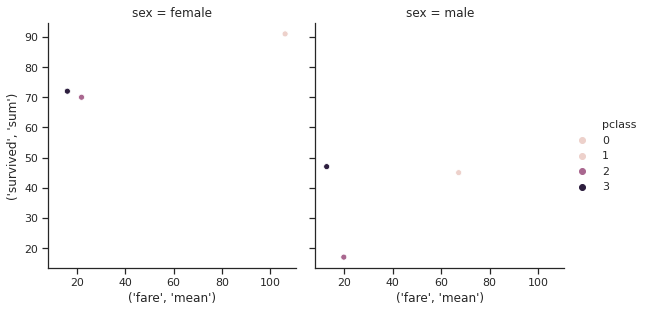

In [144]:
# Célula 2
sns.set(style="ticks")
# g = sns.PairGrid(df_titanic, hue='survived')
# g = sns.FacetGrid(df_titanic, row="alive", col="sex", margin_titles=True)


g = sns.relplot(x=("fare", "mean"), y=("survived", "sum"),
                 col="sex", hue='pclass',
                 kind="scatter", height=4.5, aspect=.9, data=df_plot.reset_index())

# -----------------------------------------------
# Comentários do aluno - Halisson S Gomides

# 1. Conforme interpretação do gráfico abaixo, 
# parece que pessoas do sexo feminino que viajavam
# na primeira classe tiveram mais chances de sobrevivência.
# O que coaduna com o que podemos ver no gráfico sobre 
# um número maior de sobreviventes mulheres que pagaram uma tarifa maior.
# -----------------------------------------------

In [143]:
# Célula 3
df_titanic['alone'] = df_titanic['alone'].apply(lambda x: 1 if x else 0)
df_plot2 = df_titanic.groupby(['sex', 'alone']).agg({'survived': ['sum'],'fare': ['mean']})
df_plot2

survived       fare
                  sum       mean
sex    alone                    
female 0          134  50.151751
       1           99  36.016933
male   0           45  47.337930
       1           64  16.713358

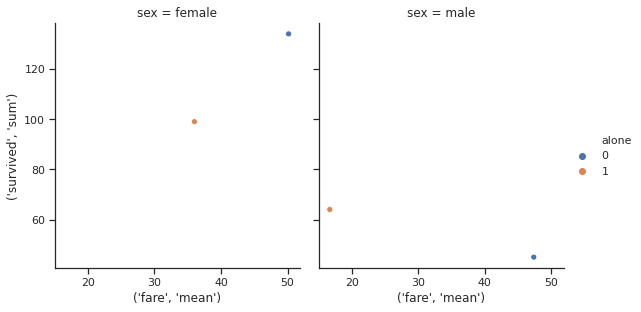

In [146]:
# Célula 4
g2 = sns.relplot(x=("fare", "mean"), y=("survived", "sum"),
                 col="sex", hue='alone',
                 kind="scatter", height=4.5, aspect=.9, data=df_plot2.reset_index())

# -----------------------------------------------
# Comentários do aluno - Halisson S Gomides

# 2. Conforme interpretação do gráfico abaixo, 
# parece que pessoas do sexo feminino que desembolsaram 
# um valor maior de tarifa e viajavam
# acompanhadas tiveram mais chances de sobrevivência.
# -----------------------------------------------